# Introduction to Monto Carlo Simulation of a S&P 500-like investment
Starting with 10,000 and investing an additional 10,000 annually, what is the probability that you will have at least 1,000,000 after 30 years of investing in the S&P 500 etf?¶

In [3]:
# 1. import needed libraries, set plots to display in notebook

import numpy as np
from pandas import Series, DataFrame
%matplotlib inline
import matplotlib.pyplot as plots
# allows currency formatting
import locale
locale.setlocale(locale.LC_ALL, 'en_CA.UTF-8')


'en_CA.UTF-8'

In [6]:
# 2. A traditional savings calculator approach.  Here, no volatility into consideration

pv = 10000
time_horizon = 30
i =.07
additions = 10000

for year in range(time_horizon):
    ending = pv * (1+i) + additions
    print(locale.currency(ending, grouping=True))
    pv = ending

$20,700.00
$32,149.00
$44,399.43
$57,507.39
$71,532.91
$86,540.21
$102,598.03
$119,779.89
$138,164.48
$157,835.99
$178,884.51
$201,406.43
$225,504.88
$251,290.22
$278,880.54
$308,402.17
$339,990.33
$373,789.65
$409,954.92
$448,651.77
$490,057.39
$534,361.41
$581,766.71
$632,490.38
$686,764.70
$744,838.23
$806,976.91
$873,465.29
$944,607.86
$1,020,730.41


In [8]:
# 3. Generating one possible future value based on market history; I will use 9% expected return with 18% volatility.  
#(you can not see changes when you rerun the cell hence will use montecarlo simulatoin)

pv = 10000
expected_return = .09
volatility = .18
time_horizon = 30
annual_addition = 10000

print("\tReturn", "\t\tEnding Value".rjust(18))
for year in range(time_horizon):
    market_return = np.random.normal(expected_return, volatility)
    fv = pv * (1 + market_return) + annual_addition
    print("\t{}".ljust(10).format(round(market_return,4)), "\t{}".rjust(10).format(locale.currency(fv, grouping=True)))
    pv = fv

	Return     		Ending Value
	0.0724               	$20,723.97
	-0.138               	$27,863.33
	-0.0599               	$36,193.64
	0.0882               	$49,386.93
	0.1401               	$66,308.50
	0.21               	$90,230.55
	0.1609               	$114,752.24
	0.0676               	$132,508.20
	-0.0413               	$137,036.45
	0.2527               	$181,664.35
	-0.1748               	$159,913.92
	-0.0703               	$158,679.64
	0.0336               	$174,013.19
	0.2394               	$225,664.57
	-0.304               	$167,065.63
	0.2242               	$214,524.07
	0.2092               	$269,398.97
	0.424               	$393,626.17
	0.1592               	$466,283.36
	0.2911               	$612,036.37
	0.341               	$830,762.86
	-0.0492               	$799,863.93
	0.16               	$937,854.02
	0.2391               	$1,172,082.79
	-0.0115               	$1,168,655.76
	-0.138               	$1,017,354.62
	-0.0942               	$931,550.37
	-0.0997               	$84

In [11]:
# 4. Simulate portfolio ending market values 

sim = DataFrame()
iterations = 5000


for x in range(iterations):
    expected_return = .09
    volatility = .18
    time_horizon = 30
    pv = 10000
    annual_investment = 10000
    stream = []
    for i in range(time_horizon):
        end = round(pv * (1 + np.random.normal(expected_return,volatility)) + annual_investment,2)
        
        stream.append(end)

        pv = end

    
    sim[x] = stream

In [14]:
first_five = list(range(5))
sim[first_five]

,0,1,2,3,4
0,21769.21,24114.91,21613.79,22328.79,18647.48
1,27977.91,29070.13,35703.40,37572.52,32669.16
2,48770.49,32385.76,46180.40,47421.62,41209.68
3,71865.80,40944.22,83681.17,47860.48,51124.01
4,77946.48,62277.61,94634.92,68973.14,60420.14
5,96127.54,70742.39,105389.35,87331.92,79576.43
6,105693.72,65976.17,108033.53,111445.67,65879.83
7,151815.15,82066.64,89308.26,94559.26,90116.47
8,163437.77,96061.15,112938.16,137803.55,131295.74
9,213717.16,95739.65,125043.42,163538.04,137343.87


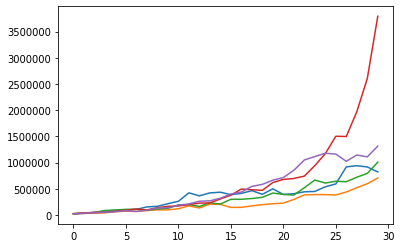

In [15]:
# 6. Plot first five simulated portfolios
plots.plot(sim[first_five])

In [16]:
# 7. Generate summary statistics of 29th row with numpy functions

print("Count:", len(sim.loc[29]))
print("Mean: ", locale.currency(np.mean(sim.loc[29]),grouping=True))
print("SD: ",locale.currency(np.std(sim.loc[29]),grouping=True))
print("Max: ",locale.currency(np.max(sim.loc[29]), grouping=True))
print("Min: ", locale.currency(np.min(sim.loc[29]), grouping=True))


Count: 5000
Mean:  $1,490,775.38
SD:  $1,160,909.55
Max:  $16,811,410.06
Min:  $133,303.05


In [17]:
# 8. Generating more comprehensive summary statistics with pandas describe function
ending_values = sim.loc[29]
ending_values.describe()

count    5.000000e+03
mean     1.490775e+06
std      1.161026e+06
min      1.333030e+05
25%      7.497760e+05
50%      1.180248e+06
75%      1.844596e+06
max      1.681141e+07
Name: 29, dtype: float64

(array([ 93., 344., 456., 524., 503., 458., 384., 373., 309., 254., 200.,
        153., 137., 104., 115.,  81.,  78.,  62.,  43.,  42.,  38.,  25.,
         27.,  28.,  17.,  15.,  18.,  11.,  12.,  14.,   7.,   7.,   7.,
         11.,   6.,   5.,   5.,   5.,   3.,   3.,   5.,   1.,   1.,   1.,
          2.,   1.,   1.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,
          2.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  133303.05  ,   300084.1201,   466865.1902,   633646.2603,
          800427.3304,   967208.4005,  1133989.4706,  1300770.5407,
         1467551.6108,  1634332.6809,  1801113.751 ,  1967894.8211,
         2134675.8912,  2301456.9613,  2468238.0314,  2635019.1015,
         2801800.1716,  2968581.2417,  3135362

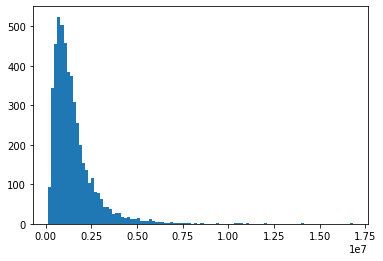

In [18]:
# 9. Get a visualization of the distribution of ending values

plots.hist(ending_values, bins=100)

In [ ]:
#mean-centered at  1.490775e+06 


In [20]:
# 10. Calculate probability of seeing a specific ending_value or less, 
# for example get close to the 75%ile, or $1,000,000

len(ending_values[ending_values<1000000])/ len(ending_values)

0.4044

In [21]:
# 11. You can't really get a point estimate, but you can get a range ending values

len(ending_values[(ending_values> 800000) & (ending_values< 1100000)]) /len(ending_values)

0.1766

In [22]:
# 12. You can get a more comprehensive table of percentiles easily using numpy's percentile function

p_tiles = np.percentile(ending_values,[5,10,15,25,75,85,90, 95])
for p in range(len(p_tiles)):
    l = [5,10,15,25,75,85,90,95]
    print( "{}%-ile: ".format(l[p]).rjust(15),"{}".format(locale.currency(p_tiles[p], grouping=True)))

       5%-ile:  $391,355.16
      10%-ile:  $492,255.37
      15%-ile:  $582,264.57
      25%-ile:  $749,776.03
      75%-ile:  $1,844,596.12
      85%-ile:  $2,381,424.47
      90%-ile:  $2,821,022.36
      95%-ile:  $3,620,889.53
